# General Overview - Statistical Analysis

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm, t, chisquare
from scipy.stats import chi2_contingency
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('diabetes_visual.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67684 entries, 0 to 67683
Data columns (total 41 columns):
race                        67684 non-null object
gender                      67684 non-null object
age                         67684 non-null object
discharge_disposition_id    67684 non-null object
admission_source_id         67684 non-null int64
time_in_hospital            67684 non-null int64
num_lab_procedures          67684 non-null int64
num_procedures              67684 non-null int64
num_medications             67684 non-null int64
num_outpatient              67684 non-null int64
num_emergency               67684 non-null int64
num_inpatient               67684 non-null int64
diag_1                      67684 non-null object
diag_2                      67684 non-null object
diag_3                      67684 non-null object
num_diagnoses               67684 non-null int64
max_glu_serum               67684 non-null object
A1Cresult                   67684 non-null object


In [4]:
diabetes.head(10)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,Caucasian,Female,[0-10),Unknown,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,Caucasian,Female,[10-20),Home,7,3,59,0,18,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),Home,7,2,11,5,13,2,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),Home,7,2,44,1,16,0,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),Home,7,1,51,0,8,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
5,Caucasian,Male,[50-60),Home,2,3,31,6,16,0,...,No,No,Steady,No,No,No,No,Yes,YES,Urgent
6,Caucasian,Male,[60-70),Home,2,4,70,1,21,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective
7,Caucasian,Male,[70-80),Home,7,5,73,0,12,0,...,No,No,No,No,No,No,No,Yes,YES,Emergency
8,Caucasian,Female,[80-90),Home,4,13,68,2,28,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Urgent
9,Caucasian,Female,[90-100),Hospital,4,12,33,3,18,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective


In [5]:
round(diabetes.describe(), 2)

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,67684.00,67684.00,67684.00,67684.00,67684.00,67684.00,67684.00,67684.00,67684.00
mean,4.42,4.27,42.81,1.42,15.61,0.28,0.10,0.18,7.24
std,2.97,2.93,19.91,1.75,8.11,0.98,0.44,0.59,1.98
min,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,7.00,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,7.00,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,25.00,14.00,109.00,6.00,60.00,20.00,10.00,8.00,9.00


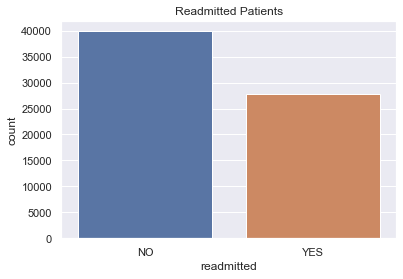

In [6]:
# readmit rates
sns.countplot(x='readmitted', data=diabetes)
plt.title('Readmitted Patients')
plt.show()

# categorical variables

The categorical variables are: race, gender, age, discharge disposition, diagnosis 1, 2, and 3, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, metformin-pioglitazone, change, diabetesMed, readmitted, and admission_type.

For the categorical variables, we are using the chi-square test for association with a p-value of 0.005.

## chi-square test for association

In [7]:
# define a function that returns a table, a chi-square value, and a p value
def chisquare_test(var):
    chi_test = pd.crosstab(var, diabetes.readmitted)
    display(chi_test)
    
    chisq_value, pvalue, df, expected = chi2_contingency(chi_test)
    
    print('Chi-square value: ', chisq_value)
    print('p-value: ', pvalue)

In [8]:
cols_cat = ['race', 'gender', 'age', 'discharge_disposition_id', 
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 
            'change', 'diabetesMed', 'admission_type']

for x in cols_cat:
    print(x)
    chisquare_test(diabetes[x])
    print('\n')

race


readmitted,NO,YES
race,,
AfricanAmerican,7618,4944
Asian,339,148
Caucasian,30222,21777
Hispanic,960,528
Other,758,390


Chi-square value:  95.35500868769964
p-value:  9.57748006621087e-20


gender


readmitted,NO,YES
gender,,
Female,20993,15090
Male,18904,12697


Chi-square value:  18.682128528598497
p-value:  1.5442308233002516e-05


age


readmitted,NO,YES
age,,
[0-10),125,27
[10-20),358,164
[20-30),729,347
[30-40),1748,857
[40-50),4215,2391
[50-60),7461,4507
[60-70),8939,6211
[70-80),9427,7747
[80-90),5823,4910


Chi-square value:  508.3321225396082
p-value:  9.448161999640263e-104


discharge_disposition_id


readmitted,NO,YES
discharge_disposition_id,,
Home,30366,20586
Hospital,7442,6076
Unknown,2089,1125


Chi-square value:  142.23647038400597
p-value:  1.2994000927097769e-31


diag_1


readmitted,NO,YES
diag_1,,
Circulatory,11800,8880
Diabetes,3171,2398
Digestive,3803,2507
Genitourinary,2021,1324
Injury,2689,1783
Musculoskeletal,2525,1412
Neoplasms,1646,815
Other,6995,4718
Respiratory,5247,3950


Chi-square value:  174.23069242157698
p-value:  1.6728549960365576e-33


diag_2


readmitted,NO,YES
diag_2,,
Circulatory,12130,9260
Diabetes,5793,3601
Digestive,1709,1055
Genitourinary,3023,2148
Injury,1112,625
Musculoskeletal,772,476
Neoplasms,896,656
None,154,34
Other,10442,7071


Chi-square value:  157.15156643247795
p-value:  2.89977069937134e-29


diag_3


readmitted,NO,YES
diag_3,,
Circulatory,11575,8664
Diabetes,7393,4742
Digestive,1519,1106
Genitourinary,2190,1720
Injury,850,503
Musculoskeletal,801,518
Neoplasms,651,462
None,752,278
Other,11674,7782


Chi-square value:  188.26626683416112
p-value:  9.489181524888591e-36


max_glu_serum


readmitted,NO,YES
max_glu_serum,,
>200,497,421
>300,352,351
None,38081,26306
Norm,967,709


Chi-square value:  33.767644760872024
p-value:  2.2180575101711702e-07


A1Cresult


readmitted,NO,YES
A1Cresult,,
>7,1693,1079
>8,3572,2409
None,32322,22965
Norm,2310,1334


Chi-square value:  41.792955513389366
p-value:  4.439239359403798e-09


change


readmitted,NO,YES
change,,
Ch,17299,13075
No,22598,14712


Chi-square value:  90.26208363524
p-value:  2.086123341920725e-21


diabetesMed


readmitted,NO,YES
diabetesMed,,
No,10466,5784
Yes,29431,22003


Chi-square value:  263.1490865304544
p-value:  3.5326942191165925e-59


admission_type


readmitted,NO,YES
admission_type,,
Elective,8633,4761
Emergency,20064,14304
Newborn,6,3
Trauma Center,17,0
Unknown,4100,3659
Urgent,7077,5060


Chi-square value:  306.04108551798583
p-value:  5.0322393213944946e-64




Based on the chi-square and p-value, we can safely say that there is no relation between the independent variables and the target variable.

### medications

In [9]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']

for x in medications:
    print(x)
    chisquare_test(diabetes[x])
    print('\n')

metformin


readmitted,NO,YES
metformin,,
Down,251,162
No,31070,22207
Steady,8073,5117
Up,503,301


Chi-square value:  41.42771648762087
p-value:  5.306385256450762e-09


repaglinide


readmitted,NO,YES
repaglinide,,
Down,16,12
No,39443,27336
Steady,400,408
Up,38,31


Chi-square value:  30.61666891539957
p-value:  1.023625837445542e-06


nateglinide


readmitted,NO,YES
nateglinide,,
Down,5,3
No,39628,27575
Steady,253,204
Up,11,5


Chi-square value:  3.1172354991550177
p-value:  0.37390058337525456


chlorpropamide


readmitted,NO,YES
chlorpropamide,,
Down,1,0
No,39857,27757
Steady,38,27
Up,1,3


Chi-square value:  2.607570994928394
p-value:  0.4561637994050384


glimepiride


readmitted,NO,YES
glimepiride,,
Down,70,60
No,37836,26302
Steady,1856,1337
Up,135,88


Chi-square value:  2.5704349381570117
p-value:  0.4626962745263229


acetohexamide


readmitted,NO,YES
acetohexamide,,
No,39897,27786
Steady,0,1


Chi-square value:  0.0330714174807804
p-value:  0.8556961395826508


glipizide


readmitted,NO,YES
glipizide,,
Down,173,181
No,35076,23917
Steady,4339,3440
Up,309,249


Chi-square value:  56.43125402220267
p-value:  3.398677324637192e-12


glyburide


readmitted,NO,YES
glyburide,,
Down,214,187
No,35572,24608
Steady,3772,2737
Up,339,255


Chi-square value:  9.350429794654527
p-value:  0.024976944077734403


tolbutamide


readmitted,NO,YES
tolbutamide,,
No,39886,27782
Steady,11,5


Chi-square value:  0.29501066862981273
p-value:  0.5870273238116831


pioglitazone


readmitted,NO,YES
pioglitazone,,
Down,37,43
No,37026,25566
Steady,2747,2092
Up,87,86


Chi-square value:  21.297025149738758
p-value:  9.13329815042189e-05


rosiglitazone


readmitted,NO,YES
rosiglitazone,,
Down,49,22
No,37404,25757
Steady,2365,1959
Up,79,49


Chi-square value:  37.63480118139071
p-value:  3.377170903998541e-08


acarbose


readmitted,NO,YES
acarbose,,
No,39803,27687
Steady,90,94
Up,4,6


Chi-square value:  9.162230448580813
p-value:  0.010243466161725254


miglitol


readmitted,NO,YES
miglitol,,
Down,0,1
No,39890,27774
Steady,7,11
Up,0,1


Chi-square value:  5.865287155666833
p-value:  0.11835143890570163


troglitazone


readmitted,NO,YES
troglitazone,,
No,39896,27785
Steady,1,2


Chi-square value:  0.09921718426227408
p-value:  0.7527710734649723


tolazamide


readmitted,NO,YES
tolazamide,,
No,39877,27777
Steady,20,10


Chi-square value:  0.4545597869990823
p-value:  0.5001775003856661


insulin


readmitted,NO,YES
insulin,,
Down,3881,3250
No,20245,13076
Steady,12165,8556
Up,3606,2905


Chi-square value:  140.0651994973817
p-value:  3.659330845745331e-30


glyburide-metformin


readmitted,NO,YES
glyburide-metformin,,
Down,3,0
No,39624,27588
Steady,265,198
Up,5,1


Chi-square value:  4.125492487716569
p-value:  0.2482281726201234


glipizide-metformin


readmitted,NO,YES
glipizide-metformin,,
No,39894,27783
Steady,3,4


Chi-square value:  0.23152044631797528
p-value:  0.6303987251183067


metformin-pioglitazone


readmitted,NO,YES
metformin-pioglitazone,,
No,39896,27787
Steady,1,0


Chi-square value:  0.0330714174807804
p-value:  0.8556961395826508




The medications: nateglinide (Chi-square value: 2.44, p-value: 0.485), chlorpropamide (Chi-square value: 2.62, p-value:  0.453), glimepiride (Chi-square value: 2.58, p-value:  0.459), acetohexamide (Chi-square value: 0.033, p-value: 0.854), glyburide (Chi-square value: 9.51, p-value: 0.023), tolbutamide (Chi-square value: 0.286, p-value: 0.592), acarbose (Chi-square value: 9.79, p-value: 0.007), miglitol (Chi-square value: 5.9, p-value: 0.116), troglitazone (Chi-square value: 0.101, p-value: 0.749), tolazamide (Chi-square value: 0.439, p-value: 0.507), glyburide-metformin (Chi-square value: 4.032, p-value: 0.257), glipizide-metformin (Chi-square value: 0.236, p-value: 0.626), and metformin-pioglitazone (Chi-square value: 0.033, p-value: 0.854) all failed to pass the test since they have p-values > 0.005.

Since these variables are not independent of the target variable, we are removing them from the dataset.

In [10]:
meds = ['nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glyburide', 'tolbutamide', 'acarbose', 
        'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 
        'metformin-pioglitazone']

diabetes = diabetes.drop(columns=meds)

In [11]:
diabetes.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,...,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,admission_type
0,Caucasian,Female,[0-10),Unknown,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,Caucasian,Female,[10-20),Home,7,3,59,0,18,0,...,No,No,No,No,No,Up,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),Home,7,2,11,5,13,2,...,No,No,Steady,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),Home,7,2,44,1,16,0,...,No,No,No,No,No,Up,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),Home,7,1,51,0,8,0,...,No,No,Steady,No,No,Steady,Ch,Yes,NO,Emergency


# numerical variables

## statistical testing - 2-sample t-test

The numerical variables are: admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, num_outpatient, num_emergency, num_inpatient, diag_1, diag_2, diag_3, and num_diagnoses.

Using the 2-sample t-test, we are aiming to determine if there is a statistical signifiance between the means of two classes.

In [12]:
# binary classification, 2 sample t-test
diabetes = diabetes.reset_index(drop=True)

In [13]:
# drop admission source id since each id correlates to a string
diabetes = diabetes.drop(columns=['admission_source_id'])

In [14]:
# define a function that creates two lists based on readmits for 2 sample t-tests
def two_lists(list1, list2, var):
    for x in range(len(diabetes)):
        if diabetes.readmitted[x] == 'YES':
            list1.append(diabetes[var][x])
        else:
            list2.append(diabetes[var][x])

In [15]:
# time in hospital - null hypothesis: time spent in hospital the same for readmitted and not readmitted patients
time_in_hospital_yes = []
time_in_hospital_no = []

# create lists
two_lists(time_in_hospital_yes, time_in_hospital_no, 'time_in_hospital')

# two sample t-test
stats.ttest_ind(time_in_hospital_yes, time_in_hospital_no) # reject null hypothesis

Ttest_indResult(statistic=16.88131827756077, pvalue=8.345752144296417e-64)

In [16]:
# num_lab_procedures - separate into two lists based on Yes and No for readmitted
num_lab_procedures_yes = []
num_lab_procedures_no = []

# create lists
two_lists(num_lab_procedures_yes, num_lab_procedures_no, 'num_lab_procedures')

# two sample t-test
stats.ttest_ind(num_lab_procedures_yes, num_lab_procedures_no) # reject null hypothesis

Ttest_indResult(statistic=14.423018467820937, pvalue=4.3555344027820233e-47)

In [17]:
# num_medications - separate into two lists based on Yes and No for readmitted
num_medications_yes = []
num_medications_no = []

# create lists
two_lists(num_medications_yes, num_medications_no, 'num_medications')

# two sample t-test
stats.ttest_ind(num_medications_yes, num_medications_no) # reject null hypothesis

Ttest_indResult(statistic=10.340419354456078, pvalue=4.828169359400057e-25)

In [18]:
# num_outpatient - separate into two lists based on Yes and No for readmitted
num_outpatient_yes = []
num_outpatient_no = []

# create lists
two_lists(num_outpatient_yes, num_outpatient_no, 'num_outpatient')

# two sample t-test
stats.ttest_ind(num_outpatient_yes, num_outpatient_no) # reject null hypothesis

Ttest_indResult(statistic=17.06031476573755, pvalue=4.0110880768485004e-65)

In [19]:
# num_emergency - separate into two lists based on Yes and No for readmitted
num_emergency_yes = []
num_emergency_no = []

# create lists
two_lists(num_emergency_yes, num_emergency_no, 'num_emergency')

# two sample t-test
stats.ttest_ind(num_emergency_yes, num_emergency_no) # reject null hypothesis

Ttest_indResult(statistic=23.036256395258736, pvalue=5.707924207649409e-117)

In [20]:
# num_inpatient - separate into two lists based on Yes and No for readmitted
num_inpatient_yes = []
num_inpatient_no = []

# create lists
two_lists(num_inpatient_yes, num_inpatient_no, 'num_inpatient')

# two sample t-test
stats.ttest_ind(num_inpatient_yes, num_inpatient_no) # reject null hypothesis

Ttest_indResult(statistic=38.487770059470556, pvalue=0.0)

In [21]:
# num_diagnoses - separate into two lists based on Yes and No for readmitted
num_diagnoses_yes = []
num_diagnoses_no = []

# create lists
two_lists(num_diagnoses_yes, num_diagnoses_no, 'num_diagnoses')

# two sample t-test
stats.ttest_ind(num_diagnoses_yes, num_diagnoses_no) # reject null hypothesis

Ttest_indResult(statistic=28.561851032501664, pvalue=2.3070669890539937e-178)

Based on the [2-sample t-tests](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), we can conclude that each variable is [independent](http://benalexkeen.com/comparative-statistics-in-python-using-scipy/) of the target variable, readmitted.

# label encoding

Binary columns will be replaced with 0 for No and 1 for Yes. In the gender column, Male and Female will be replaced with 0 and 1 respectively.

In [22]:
# display unique entries for each column
# count the unique values, equal to 1 means all values are the same
for x in diabetes.columns:
    print('Column Name: {}'.format(x)) 
    print('Unique Values: {}'.format(diabetes[x].unique()))

Column Name: race
Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Column Name: gender
Unique Values: ['Female' 'Male']
Column Name: age
Unique Values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Column Name: discharge_disposition_id
Unique Values: ['Unknown' 'Home' 'Hospital']
Column Name: time_in_hospital
Unique Values: [ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]
Column Name: num_lab_procedures
Unique Values: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  19  64  25  53  52  87  27  37  28  36  48  10   2  65  67  40
  58  57  32  83  34  39  69  38  22  96  46  72  78  56  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3  13  80  85
  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105 103  86  98
  20   5   6   8   7  89  91  94  92   4 101 102  99 100 107 108 106 104
 109]
Column Name: num_procedures
Unique Values: [0 5 1 6 2 3 4

In [23]:
# readmitted: No and Yes
diabetes['readmitted'] = diabetes['readmitted'].replace({'NO': 0, 'YES': 1})

In [24]:
# gender: male and female
diabetes['gender'] = diabetes['gender'].replace({'Male': 0, 'Female': 1})

In [25]:
# change: No and Ch(ange)
diabetes['change'] = diabetes['change'].replace({'No': 0, 'Ch': 1})

In [26]:
# diabetesMed: No and Yes
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace({'No': 0, 'Yes': 1})

Looking at the values for each columns, some have identical values. Since we are using dummy variables to encode the data, the values must be modified to avoid confusion when analyzing correlation coefficients and building the machine learning model.

In [27]:
# Column Name: race
# Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
diabetes['race'] = diabetes['race'].replace('Other', 'Other_race')

In [28]:
# Column Name: discharge_disposition_id
# Unique Values: ['Unknown' 'Home' 'Hospital']
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace('Unknown', 'Unknown_discharge')

In [29]:
# Column Name: diag_1
# Unique Values: ['Diabetes' 'Other' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury' 
# 'Genitourinary' 'Musculoskeletal' 'Digestive']
diabetes['diag_1'] = diabetes['diag_1'].replace({'Diabetes':'Diabetes_1', 'Other':'Other_1', 'Neoplasms':'Neoplasms_1', 
                                                 'Circulatory':'Circulatory_1', 'Respiratory':'Respiratory_1', 
                                                 'Injury':'Injury_1', 'Genitourinary':'Genitourinary_1', 
                                                 'Musculoskeletal':'Musculoskeletal_1', 'Digestive':'Digestive_1'})

In [30]:
# Column Name: diag_2
# Unique Values:  ['None' 'Diabetes' 'Neoplasms' 'Circulatory' 'Respiratory' 'Other'
#  'Injury' 'Musculoskeletal' 'Genitourinary' 'Digestive']
diabetes['diag_2'] = diabetes['diag_2'].replace({'None':'None_2', 'Diabetes':'Diabetes_2', 'Neoplasms':'Neoplasms_2', 
                                                 'Circulatory':'Circulatory_2', 'Respiratory':'Respiratory_2', 
                                                 'Injury':'Injury_2', 'Genitourinary':'Genitourinary_2', 
                                                 'Musculoskeletal':'Musculoskeletal_2', 'Digestive':'Digestive_2',
                                                'Other':'Other_2'})

In [31]:
# Column Name: diag_3
# Unique Values:  ['None' 'Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury'
#  'Neoplasms' 'Genitourinary' 'Digestive' 'Musculoskeletal']
diabetes['diag_3'] = diabetes['diag_3'].replace({'None':'None_3', 'Diabetes':'Diabetes_3', 'Neoplasms':'Neoplasms_3', 
                                                 'Circulatory':'Circulatory_3', 'Respiratory':'Respiratory_3', 
                                                 'Injury':'Injury_3', 'Genitourinary':'Genitourinary_3', 
                                                 'Musculoskeletal':'Musculoskeletal_3', 'Digestive':'Digestive_3',
                                                'Other':'Other_3'})

In [32]:
# Column Name: max_glu_serum
# Unique Values: ['None' '>300' 'Norm' '>200']
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace({'None':'None_glu', 'Norm':'Norm_glu'})

In [33]:
# Column Name: A1Cresult
# Unique Values: ['None' '>7' '>8' 'Norm']
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace({'None':'None_a1c', 'Norm':'Norm_a1c'})

In [34]:
# Column Name: metformin
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['metformin'] = diabetes['metformin'].replace({'No':'No_metformin', 'Steady':'Steady_metformin', 
                                                       'Up':'Up_metformin', 'Down':'Down_metformin'})

In [35]:
# Column Name: repaglinide
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['repaglinide'] = diabetes['repaglinide'].replace({'No':'No_repaglinide', 'Steady':'Steady_repaglinide', 
                                                       'Up':'Up_repaglinide', 'Down':'Down_repaglinide'})

In [36]:
# Column Name: glipizide
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['glipizide'] = diabetes['glipizide'].replace({'No':'No_glipizide', 'Steady':'Steady_glipizide', 
                                                       'Up':'Up_glipizide', 'Down':'Down_glipizide'})

In [37]:
# Column Name: pioglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['pioglitazone'] = diabetes['pioglitazone'].replace({'No':'No_pioglitazone', 'Steady':'Steady_pioglitazone', 
                                                       'Up':'Up_pioglitazone', 'Down':'Down_pioglitazone'})

In [38]:
# Column Name: rosiglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['rosiglitazone'] = diabetes['rosiglitazone'].replace({'No':'No_rosiglitazone', 'Steady':'Steady_rosiglitazone', 
                                                       'Up':'Up_rosiglitazone', 'Down':'Down_rosiglitazone'})

In [39]:
# Column Name: insulin
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['insulin'] = diabetes['insulin'].replace({'No':'No_insulin', 'Steady':'Steady_insulin', 
                                                       'Up':'Up_insulin', 'Down':'Down_insulin'})

In [40]:
# Column Name: admission_type
# Unique Values: ['Unknown' 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']
diabetes['admission_type'] = diabetes['admission_type'].replace('Unknown', 'Unknown_admission_type')

## age split - mean

The age column is grouped into 10 year ranges so we are replacing them when the mean of the upper and lower range.

In [41]:
# age ranges
diabetes.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [42]:
diabetes['age'] = diabetes['age'].replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, 
                                           '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, 
                                           '[80-90)': 85, '[90-100)': 95})

In [43]:
diabetes.head()

,race,gender,age,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,...,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,admission_type
0,Caucasian,1,5,Unknown_discharge,1,41,0,1,0,0,...,No_metformin,No_repaglinide,No_glipizide,No_pioglitazone,No_rosiglitazone,No_insulin,0,0,0,Unknown_admission_type
1,Caucasian,1,15,Home,3,59,0,18,0,0,...,No_metformin,No_repaglinide,No_glipizide,No_pioglitazone,No_rosiglitazone,Up_insulin,1,1,1,Emergency
2,AfricanAmerican,1,25,Home,2,11,5,13,2,0,...,No_metformin,No_repaglinide,Steady_glipizide,No_pioglitazone,No_rosiglitazone,No_insulin,0,1,0,Emergency
3,Caucasian,0,35,Home,2,44,1,16,0,0,...,No_metformin,No_repaglinide,No_glipizide,No_pioglitazone,No_rosiglitazone,Up_insulin,1,1,0,Emergency
4,Caucasian,0,45,Home,1,51,0,8,0,0,...,No_metformin,No_repaglinide,Steady_glipizide,No_pioglitazone,No_rosiglitazone,Steady_insulin,1,1,0,Emergency


## encoding categorical variables - dummy variables

In [44]:
# create dummy variables
race_var = pd.get_dummies(diabetes.race)
discharge_disposition_var = pd.get_dummies(diabetes.discharge_disposition_id)
diag_1_var = pd.get_dummies(diabetes.diag_1)
diag_2_var = pd.get_dummies(diabetes.diag_2)
diag_3_var = pd.get_dummies(diabetes.diag_3)
max_glu_serum_var = pd.get_dummies(diabetes.max_glu_serum)
A1Cresult_var = pd.get_dummies(diabetes.A1Cresult)
metformin = pd.get_dummies(diabetes.metformin)
repaglinide = pd.get_dummies(diabetes.repaglinide)
glipizide = pd.get_dummies(diabetes.glipizide)
pioglitazone = pd.get_dummies(diabetes.pioglitazone)
rosiglitazone = pd.get_dummies(diabetes.rosiglitazone)
insulin = pd.get_dummies(diabetes.insulin)
admission_type = pd.get_dummies(diabetes.admission_type)

In [45]:
# combine dummy variables
all_var = pd.concat([race_var, discharge_disposition_var, diag_1_var, diag_2_var, 
                     diag_3_var, max_glu_serum_var, A1Cresult_var, metformin, repaglinide, 
                     glipizide, pioglitazone, rosiglitazone, insulin, admission_type], axis=1)

all_var.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other_race,Home,Hospital,Unknown_discharge,Circulatory_1,Diabetes_1,...,Down_insulin,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent
0,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## labeled dataset

In [46]:
# create new diabetes data with all labeled data
diabetes_ml = pd.concat([diabetes.gender, diabetes.age, diabetes.time_in_hospital, diabetes.num_lab_procedures, 
                         diabetes.num_procedures, diabetes.num_medications, diabetes.num_outpatient, 
                         diabetes.num_emergency, diabetes.num_inpatient, diabetes.num_diagnoses, 
                         diabetes.change, diabetes.diabetesMed, all_var, diabetes.readmitted], axis=1)

diabetes_ml.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,5,1,41,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,15,3,59,0,18,0,0,0,9,...,0,0,1,0,1,0,0,0,0,1
2,1,25,2,11,5,13,2,0,1,6,...,1,0,0,0,1,0,0,0,0,0
3,0,35,2,44,1,16,0,0,0,7,...,0,0,1,0,1,0,0,0,0,0
4,0,45,1,51,0,8,0,0,0,5,...,0,1,0,0,1,0,0,0,0,0


## correlation

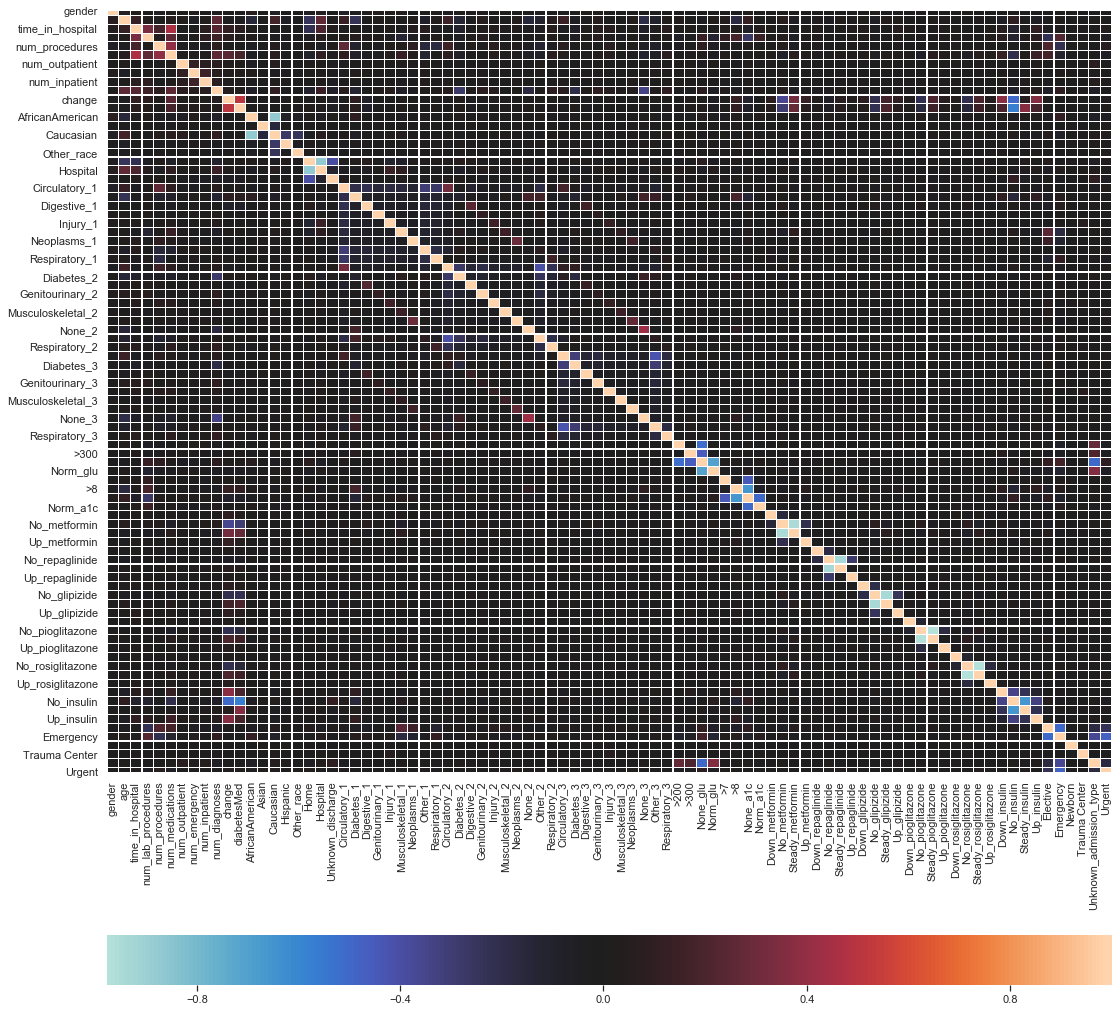

In [47]:
# correlation table
diabetes_corr = diabetes_ml.drop(columns='readmitted')

plt.figure(figsize=(18, 20))
sns.heatmap(diabetes_corr.corr(), center=0, cmap='icefire', linewidths=.1, cbar_kws={'orientation': 'horizontal'})
plt.show()

If the correlation value is greater than 0.7, then we have to drop one of the two columns.

The correlation heatmap is 96 x 96, which is quite large for this notebook. Instead, we can find each correlation coefficient individually and mark the ones that have a coefficient greater than 0.7 in a list.

In [48]:
# create empty list and add columns with their correlation coefficient greater than 0.7
corr_list = []

for x in diabetes_corr:
    for y in diabetes_corr:
        if (diabetes_corr[x].corr(diabetes_corr[y]) > 0.7) or (diabetes_corr[x].corr(diabetes_corr[y]) < -0.7):
            if x != y:
                corr_list.append([x, y, diabetes_corr[x].corr(diabetes_corr[y])])

In [49]:
corr_list

[['AfricanAmerican', 'Caucasian', -0.8692048591454438],
 ['Caucasian', 'AfricanAmerican', -0.869204859145444],
 ['Home', 'Hospital', -0.8717651998288168],
 ['Hospital', 'Home', -0.871765199828817],
 ['None_glu', 'Norm_glu', -0.7041713343865196],
 ['Norm_glu', 'None_glu', -0.7041713343865198],
 ['No_metformin', 'Steady_metformin', -0.9460871786193321],
 ['Steady_metformin', 'No_metformin', -0.9460871786193322],
 ['No_repaglinide', 'Steady_repaglinide', -0.9442047956255936],
 ['Steady_repaglinide', 'No_repaglinide', -0.9442047956255936],
 ['No_glipizide', 'Steady_glipizide', -0.9388489298821256],
 ['Steady_glipizide', 'No_glipizide', -0.9388489298821254],
 ['No_pioglitazone', 'Steady_pioglitazone', -0.97287638710512],
 ['Steady_pioglitazone', 'No_pioglitazone', -0.9728763871051199],
 ['No_rosiglitazone', 'Steady_rosiglitazone', -0.97621721783099],
 ['Steady_rosiglitazone', 'No_rosiglitazone', -0.97621721783099]]

In [50]:
diabetes_ml.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,5,1,41,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,15,3,59,0,18,0,0,0,9,...,0,0,1,0,1,0,0,0,0,1
2,1,25,2,11,5,13,2,0,1,6,...,1,0,0,0,1,0,0,0,0,0
3,0,35,2,44,1,16,0,0,0,7,...,0,0,1,0,1,0,0,0,0,0
4,0,45,1,51,0,8,0,0,0,5,...,0,1,0,0,1,0,0,0,0,0


# saving machine learning dataset

In [51]:
# save dataset to new file for machine learning
# diabetes_ml.to_csv('diabetes_ml.csv')